# Fiatlight

*Create Applications Instantly with One Line of Code*

With Fiatlight, you can instantly generate rich, interactive user interfaces. For example, the application below combines two functions:
* `generate_image`: creates an AI-generated image from a prompt
* `add_text_to_image`: adds custom text (a meme caption) to the image

<img src="_static/images/meme.jpg" width="600">

To run this application, you only need this line of code: `fiatlight.run([generate_image, add_text_to_image])`

Fiatlight then creates an **automatic user interface** where users can adjust every parameter and **save/reload** their work. You do not have to write any UI code: all you do is compose the logic by combining functions, and Fiatlight takes care of the rest.

Fiatlight lets anyone prototype, experiment, and share powerful applications—without boilerplate UI code.


> *For technical readers:*
>
> FiatLight provides automatic UI generation for functions and structured data (dataclasses, pydantic models), making it a powerful tool for rapid prototyping and application development.
>
> It is built on top of [Dear ImGui Bundle](https://github.com/pthom/imgui_bundle). Applications developed with fiatlight are very fast, and provide feedback in **real-time** (at 120 FPS!).
>
> Since Dear ImGui Bundle is available via Pyodide, Fiatlight applications can be *used locally* or deployed as *static web pages*, without any server-side component.
>
> You may think of Fiatlight as “ComfyUI for any type of data and functions”: rapid, visual, and interactive pipelines for far more than AI image generation.

_The name "Fiatlight" is inspired by "Fiat Lux", i.e. "Let there be light"._

# Videos demonstrations

*(Additional tutorials and videos are available on the [video tutorials page](video_tutorials))*

<table>

<tr>
<td style="vertical-align: center; padding-right: 20px; padding-bottom: 20px; width: 50%">

<a href="https://share.descript.com/view/gQ9ANLrtwQv" target="_blank">
<img src="_static/images/video_fl_first.jpg" width="300" />
</a>

</td>
<td style="vertical-align: center;">

**First steps Tutorial** (8 min)

Function-to-GUI basics, customization, and state persistence
</td>
</tr>

<tr>
<td style="vertical-align: center; padding-right: 20px; padding-bottom: 20px; width: 50%">

<a href="https://share.descript.com/view/gby3nPdZEEE" target="_blank">
<img src="_static/images/video_fl_interm.jpg" width="300" />
</a>

</td>
<td style="vertical-align: center;">

**Intermediate tutorial** (6 min)

Exception handling, validation, and visual debugging
</td>
</tr>

<tr>
<td style="vertical-align: center; padding-right: 20px; padding-bottom: 20px; width: 50%">

<a href="https://share.descript.com/view/tbvYBh3rpRF" target="_blank">
<img src="_static/images/video_fl_demo.jpg" width="300" />
</a>

</td>
<td style="vertical-align: center;">

**A full demo of Fiatlight** (8 min)

Complete overview showcasing AI integration, image processing, audio analysis, and data visualization capabilities across multiple application domains, using visual examples.

*This demo is an illustration of the content of this page*

</td>
</tr>

</table>


# Key Features and examples

This page intends to provide a high-level overview of Fiatlight's capabilities. For detailed tutorials, please refer to the [video tutorials](video_tutorials) and the [manual](manual).


## Create a GUI for any function

Simply call `fl.run` with a function or a list of functions, and Fiatlight will automatically generate a GUI for them.

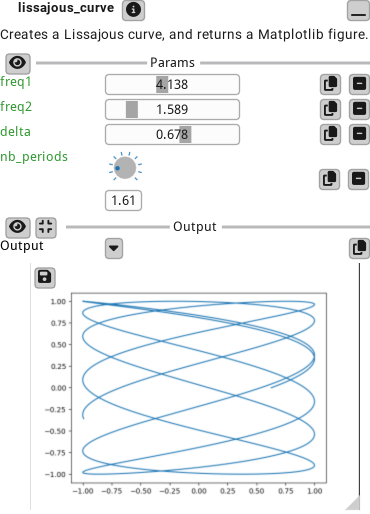

In [5]:
# Part 1: Standard Python code (no user interface)
# ------------------------------------------------
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt


def lissajous_curve(freq1: float = 5.0, freq2: float = 4.0, delta: float = np.pi / 2, nb_periods: float = 1) -> plt.Figure:
    """Creates a Lissajous curve, and returns a Matplotlib figure."""
    t = np.linspace(0, 2 * np.pi * nb_periods, 10_000)
    x = np.sin(freq1 * t + delta)
    y = np.sin(freq2 * t)
    fig, ax = plt.subplots()
    ax.plot(x, y)
    return fig


# Part 2: Add a GUI to the code in a few seconds
# -----------------------------------------------
import fiatlight as fl

# Options for widgets
fl.add_fiat_attributes(
    lissajous_curve,
    freq1__range=(0, 10), freq2__range=(0, 10), delta__range=(-np.pi, np.pi),
    nb_periods__range=(0.1, 10), nb_periods__edit_type="knob",
)
# Run the function interactively
fl.run(lissajous_curve, app_name="Interactive Lissajou Curve")

*See the application in action in the video below*

<video src="_static/videos/lissajou.mp4" controls="controls" width="30%" height="auto"></video>


## From Idea to App in 3 minutes

For example, the application we saw in the introduction can be created in just 4 lines of code: we simply import our functions and fiatlight, and call `fl.run` with the list of functions:

  0%|          | 0/1 [00:00<?, ?it/s]

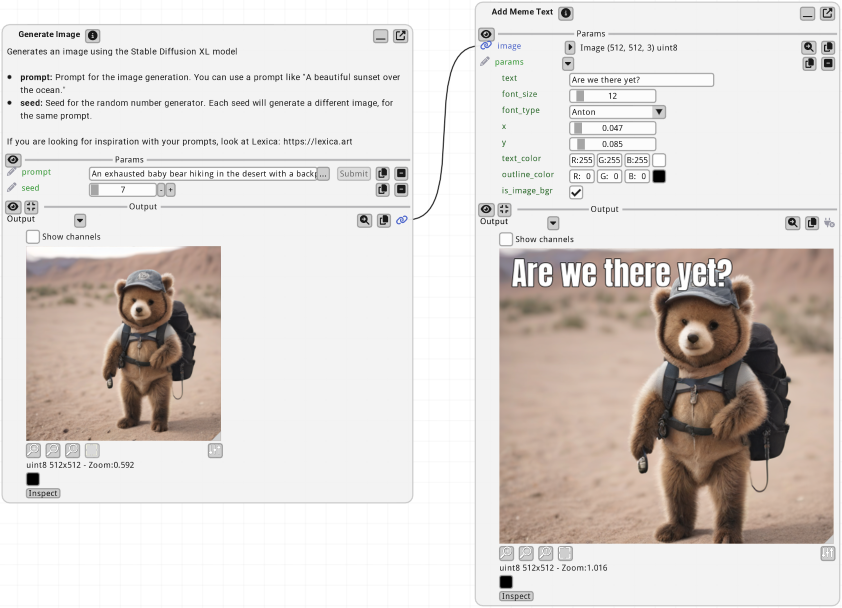

In [8]:
import fiatlight as fl
from fiatlight.fiat_kits.fiat_ai import invoke_sdxl_turbo
from fiatlight.fiat_kits.fiat_image.add_meme_text import add_meme_text
fl.run([invoke_sdxl_turbo, add_meme_text], app_name="Old school meme generator")

This application state is automatically persistent:
  * All inputs are saved: prompt, and meme text, font, color, position of the text
  * All preferences are saved: window size, position, and layout of the nodes
  * The user can save and load different state of the application (i.e. different memes)


> *For technical readers: [`invoke_sdxl_turbo`](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_kits/fiat_ai/invoke_sdxl_turbo.py) provides a simple wrapper to SDXL, and [`add_meme_text`](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/demos/images/old_school_meme.py) is a Python function that adds colored text onto an image.*



# Domain-specific Kits:

`fiatlight.fiats_kits` is intended to provide a set of pre-built functions and widgets for various domains, such as:

- **Image analysis**: Sophisticated image analysis and manipulation widgets. See [fiat_image](fiat_image.ipynb).

- **Data Visualization**: Display interactive data plots and charts for real-time data analysis, using MatPlotlib or ImPlot. See [fiat_matplotlib](fiat_matplotlib.ipynb), and [fiat_implot](fiat_implot.ipynb) (for ImPlot)

- **Data Exploration**: Provide widgets for exploring dataframes. See [fiat_dataframe](fiat_dataframe.ipynb).

- **AI**: (Draft) Provide a widget for Prompt entry, and an interface to Stable Diffusion. See [fiat_ai](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_kits/fiat_ai).


## Image analysis

*The example below shows an image which undergoes a pipeline for a dilated edge extraction. The image viewer can pan & zoom the images in sync, and display the pixel values*

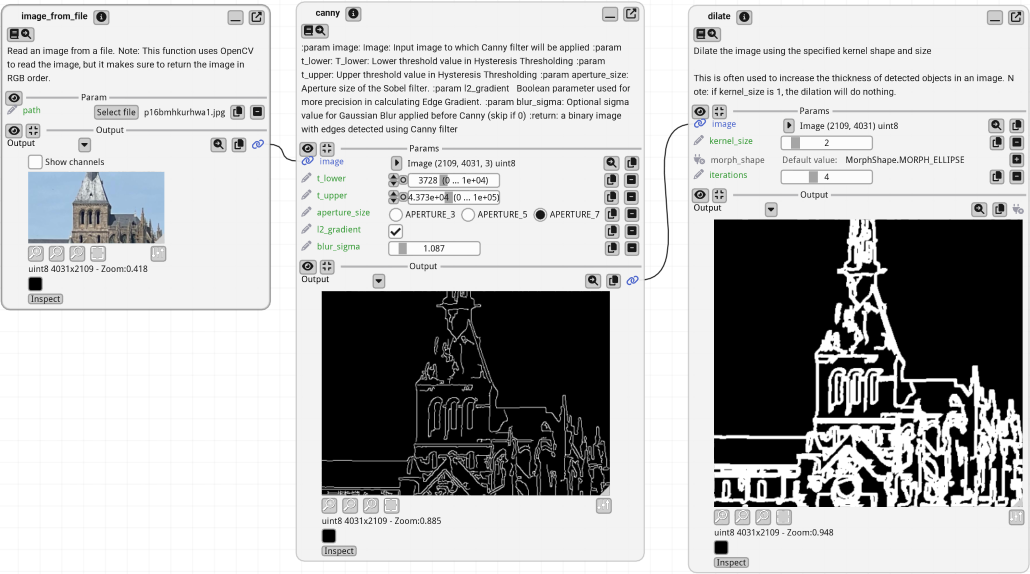

In [7]:
import fiatlight as fl
from fiatlight.fiat_kits.fiat_image import image_from_file
from fiatlight.demos.images.demo_canny import canny, dilate

fl.run([image_from_file, canny, dilate], app_name="demo_computer_vision")

>*For technical readers: [`image_from_file`](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_kits/fiat_image/image_to_from_file_gui.py) is a function that reads an image from a file, [`canny`](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/demos/images/opencv_wrappers.py) applies the Canny edge detection algorithm, and [`dilate`](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/demos/images/opencv_wrappers.py) dilates the edges.*

## Data visualization with Matplotlib and ImPlot

*In the example below, we display figures using [ImPlot](https://github.com/epezent/implot) (left) and [Matplotlib](https://matplotlib.org/) (right). Each figure provides user-settable parameters (in a given range, with customizable widgets). The sine wave function is updated in real time.*

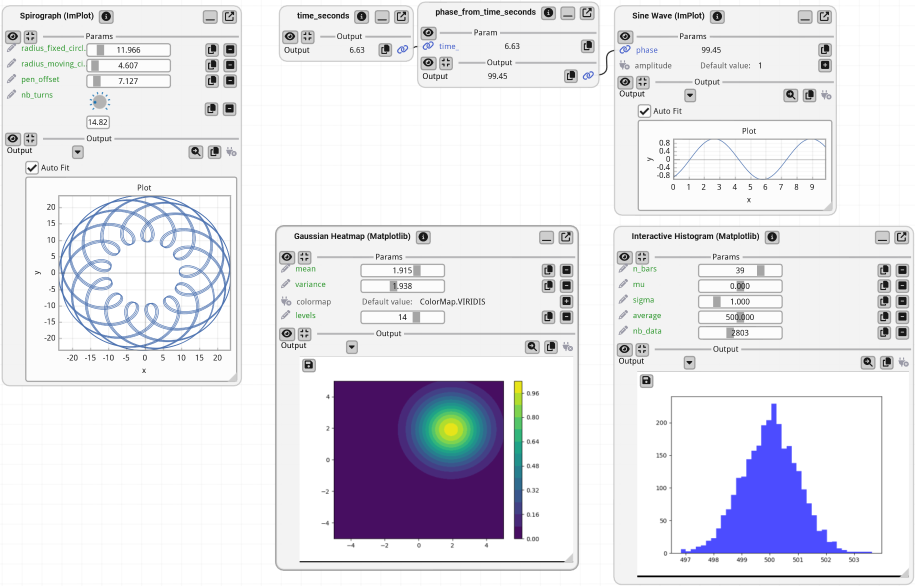

In [8]:
from fiatlight.demos.plots import demo_mix_implot_matplotib

demo_mix_implot_matplotib.main()

> *For technical readers:*
> * when a function returns a `matplotlib.figure.Figure`, its output will be displayed as a plot. See demo_matplotlib.py [source code](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_kits/fiat_matplotlib/demo_matplotlib.py).*
> * when a function returns a `fiat_implot.FloatMatrix_Dim1` or `fiat_implot.FloatMatrix_Dim2` (which are aliases for np.ndarray), its output will be displayed as a plot, using [ImPlot](https://github.com/epezent/implot). See demo_implot [source code](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_kits/fiat_implot/demo_implot.py).
> * [ImPlot](https://github.com/epezent/implot) is a plotting library for Dear ImGui. It is often faster than Matplotlib, and can be used in real-time applications. For a complete demo of ImPlot, click here: [ImPlot complete demo](https://traineq.org/implot_demo/src/implot_demo.html)*

## Data Frames
*In the example below, we display a data frame from the famous titanic example with filtering.*

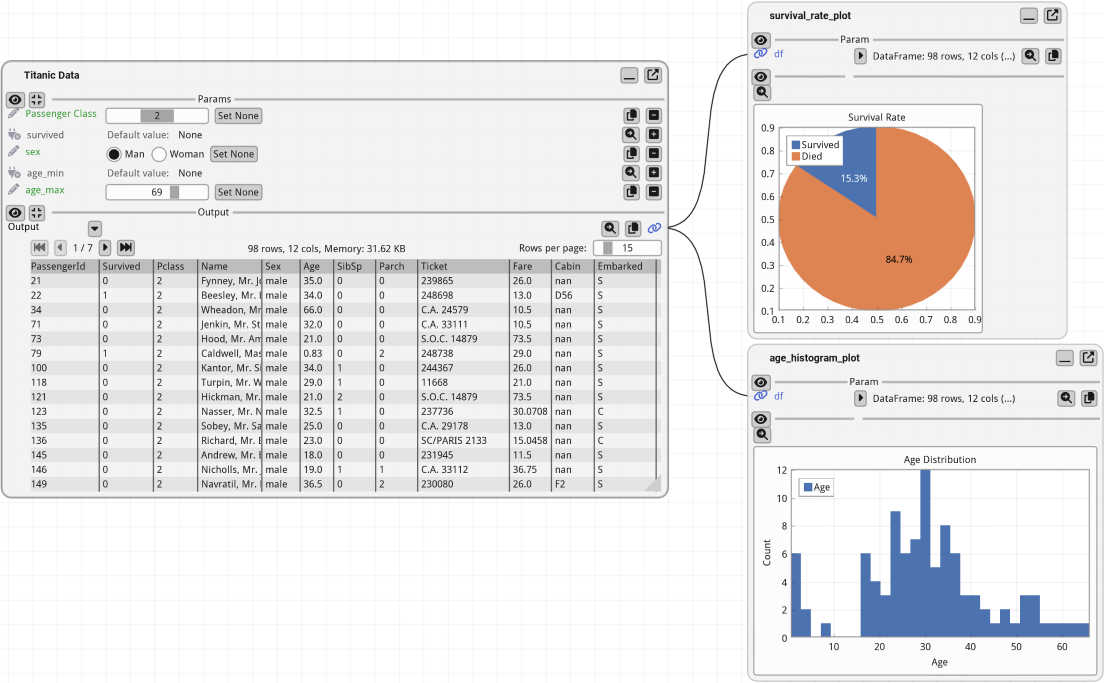

In [9]:
from fiatlight.fiat_kits.fiat_dataframe import dataframe_with_gui_demo_titanic
dataframe_with_gui_demo_titanic.main()

# Visualize, Understand, Innovate


## Visualize the Pipeline flow

*Example: the application below looks for the most frequent words in a given text file (here with the text from "Hamlet"), by applying a pipeline of transformations. It is possible to inspect the input and outputs of each function.*

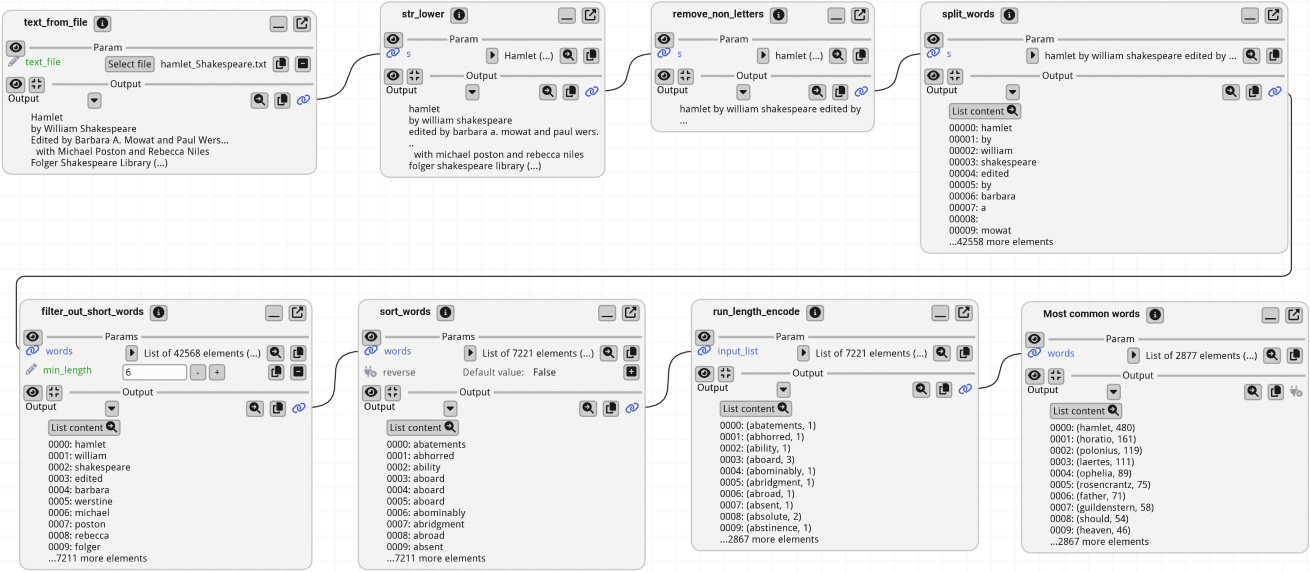

In [11]:
from fiatlight.demos.string import demo_word_count
demo_word_count.main()

> *For technical readers: demo_word_count will simply chain the following string functions:
>     `text_from_file, str_lower, split_words, filter_out_short_words,
>     sort_words, run_length_encode, sort_word_with_counts`.
> See its [source](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/demos/string/demo_word_count.py)*

## Examine and understand function internals

fiatlight provides you with powerful tools to visually debug the intermediate states of your function.

*Example: the function add_toon_edges below is a complex function that adds a toon effect to an image. We can visualize the intermediate internal variables of the function (edges, dilated edges), even if they are not returned by the function.*

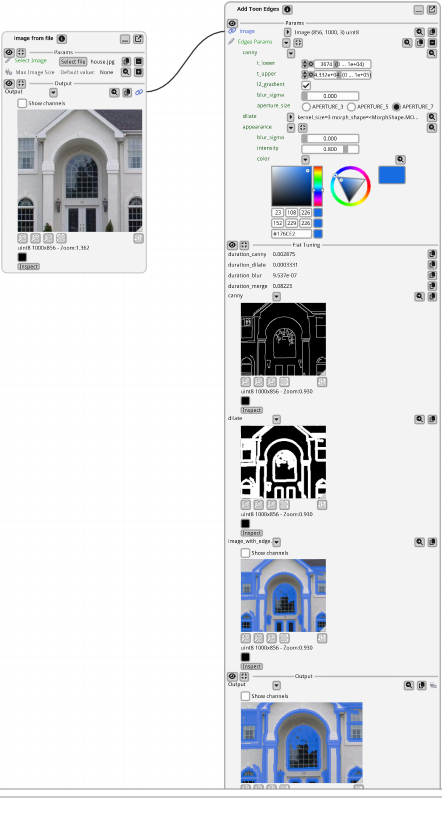

In [2]:
import fiatlight as fl
from fiatlight.fiat_kits.fiat_image import ImageU8_GRAY, ImageU8_3, image_source
from fiatlight.demos.images.toon_edges import add_toon_edges

fl.run([image_source, add_toon_edges], app_name="Toon Edges")

> *For technical readers: the function `add_toon_edges` has an attribute `fiat_tuning` that contains the internal variables that will be displayed. See [demos/images/toon_edges.py](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/demos/images/toon_edges.py).*


## Replay and debug function errors

*Example: the following application raises an error. However, this error can be replayed, with **the exact same inputs** to facilitate the debugging*

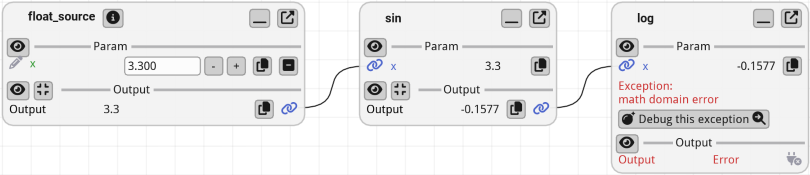

In [4]:
import fiatlight as fl
import math

def float_source(x: float) -> float:
    """A source where the user can specify an input value."""
    return x
def sin(x: float) -> float:
    return math.sin(x)
def log(x: float) -> float:
    return math.log(x)

fl.run([float_source, sin, log], app_name="Replay error")

> *For technical readers: the function `log` will raise an error when x is negative. Once you click on the "Debug this exception" button, you will be able to debug it:*

![debug break](images/debug_break.jpg)


---------------------------------------------------------------------------------------------------

# Target Audience

Fiatlight is best suited for:

* Hobbyists wanting to create interactive applications quickly
* Educators and instructors needing interactive tools for teaching programming or algorithms
* Researchers who need shareable demos or visualizations of their work
* Developers who want to fine tune their algorithms, with visual feedback
* Library authors who want to showcase or demonstrate how to use and compose their functions
* Data scientists and analysts wanting instant GUI dashboards for exploring data


# Full pdf version of this book

View or download the [full pdf](https://pthom.github.io/fi  atlight_doc/flgt.pdf) for this manual.

You may feed it into a LLM such as ChatGPT, so that it can help you when using Fiatlight.